**Default of Credit Card Clients**

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [ ]:
# Load the Dataset
df = pd.read_csv("/content/default of credit card clients.csv")


In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
# Shape of dataset
df.shape

(30001, 25)

In [ ]:
# Data type of columns
df.dtypes

,0
Unnamed: 0,object
X1,object
X2,object
X3,object
X4,object
X5,object
X6,object
X7,object
X8,object
X9,object


In [ ]:
# Basic statistics
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,30000,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
# unique value in columns
df.nunique()

,0
Unnamed: 0,30001
X1,82
X2,3
X3,8
X4,5
X5,57
X6,12
X7,12
X8,12
X9,12


In [ ]:
# Checking missing values
df.isnull().sum()

,0
Unnamed: 0,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


In [ ]:
# checking duplicate value
df.duplicated().sum()

np.int64(0)

### Correlation Heatmap

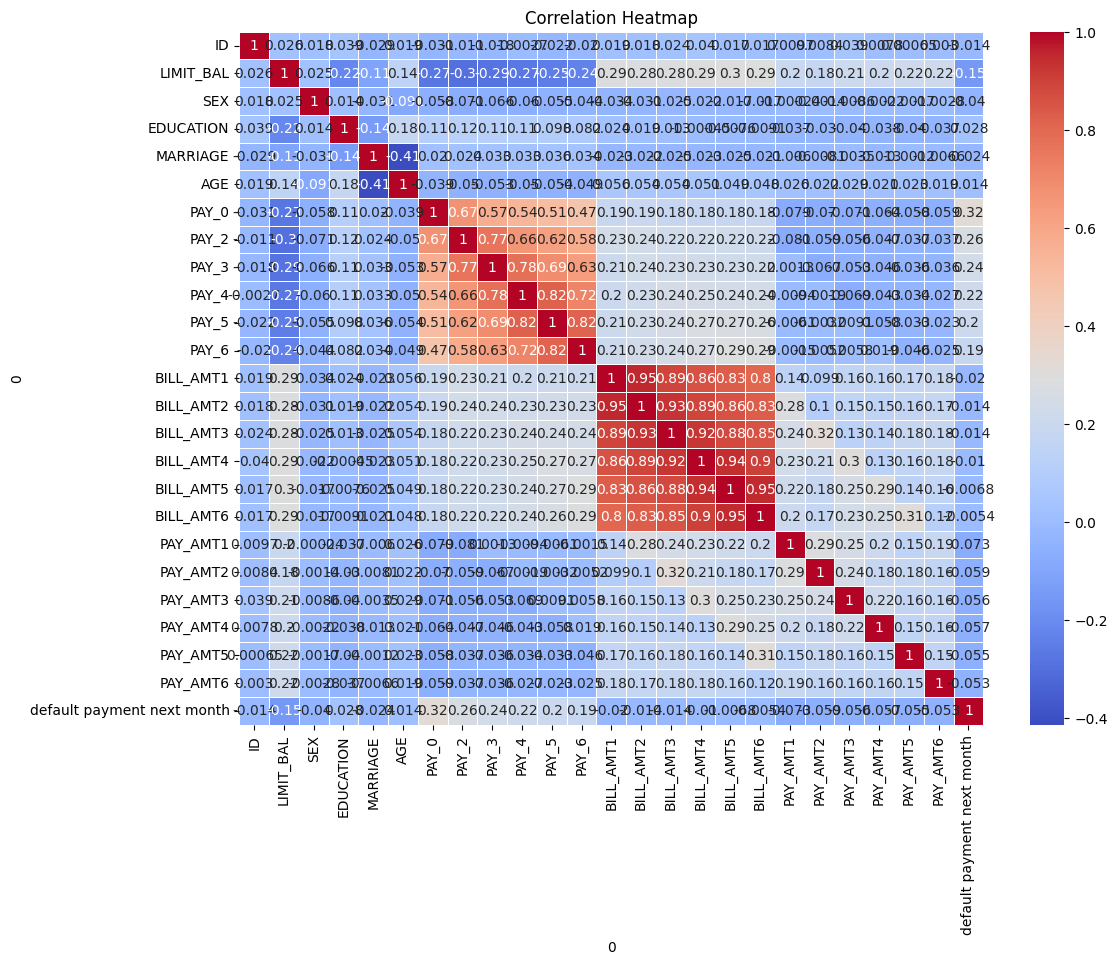

In [ ]:
# Drop the first row which contains the original header values
# Set the first row as the header
original_header = df.iloc[0]
df_numeric = df.iloc[1:].copy()
df_numeric.columns = original_header


# Convert relevant columns to numeric before calculating correlation
columns_to_numeric = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                      'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                      'default payment next month']

for col in columns_to_numeric:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Drop non-numeric columns before calculating correlation
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Distribution of Bill and Payment Amounts

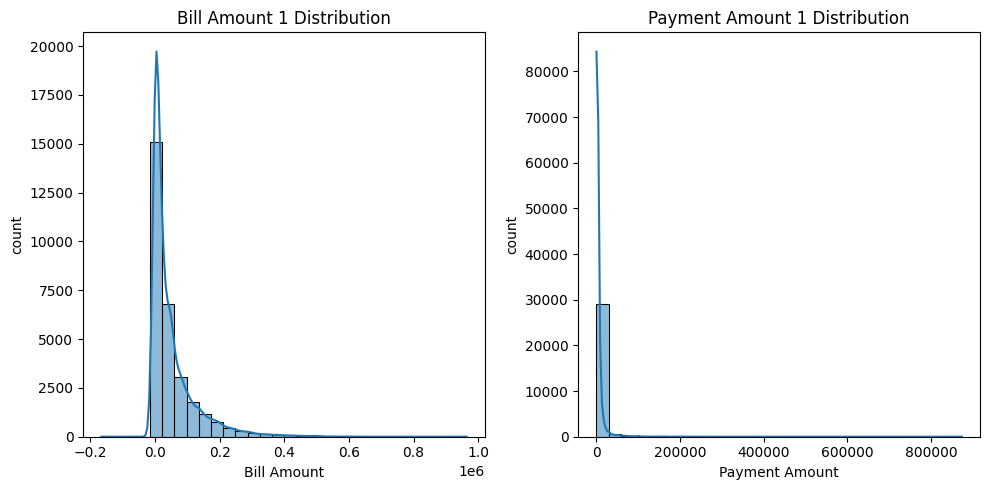

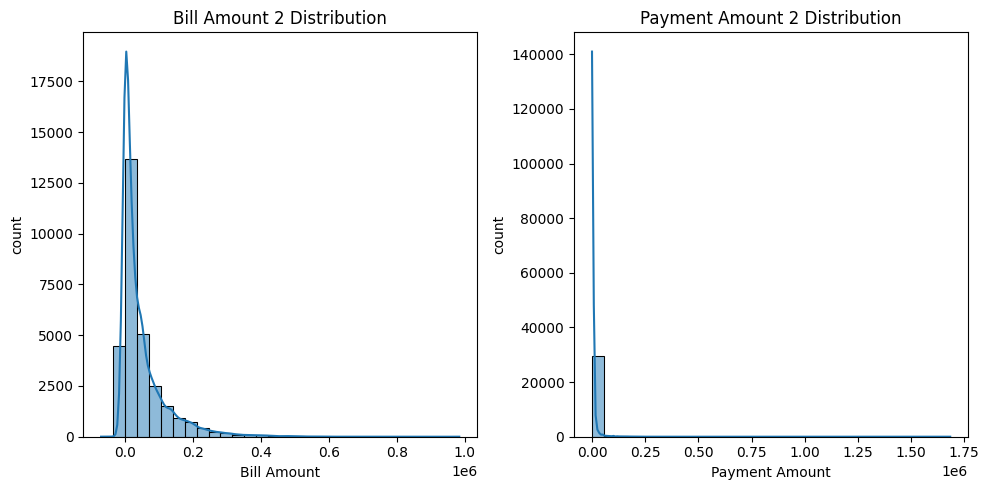

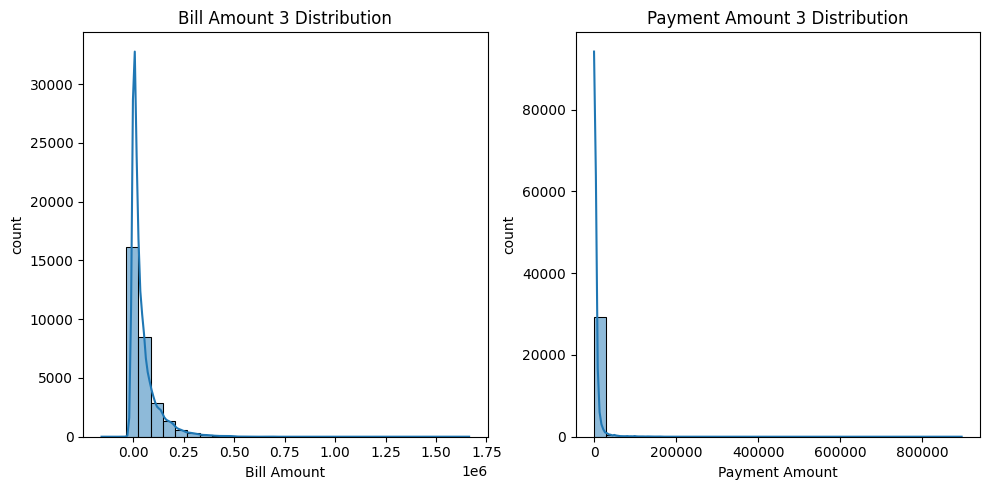

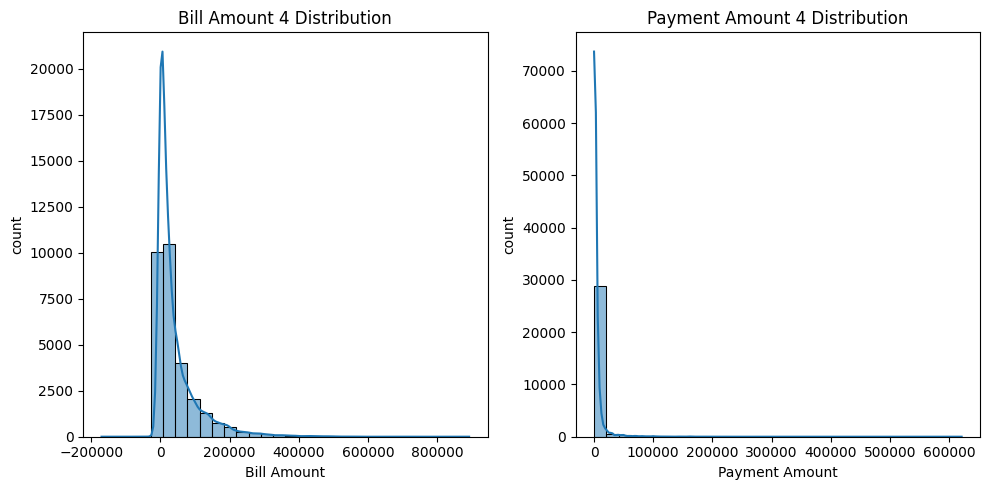

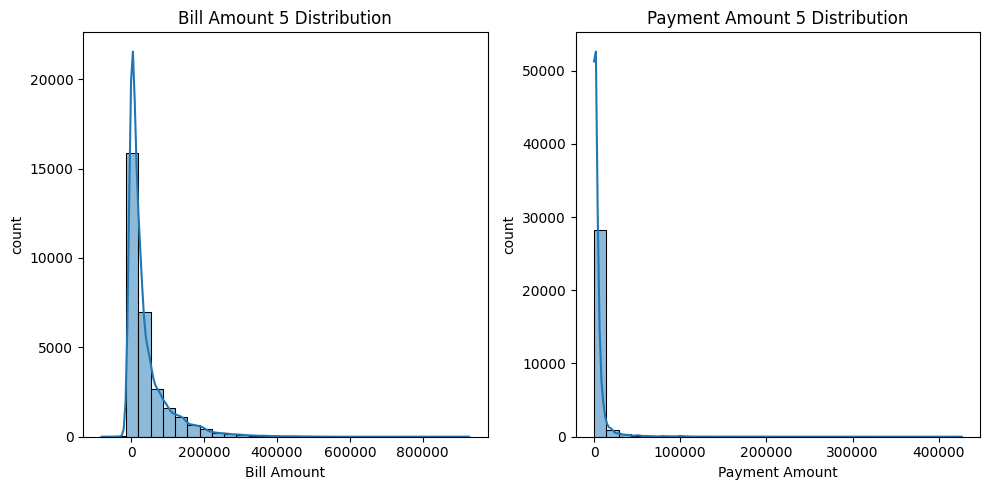

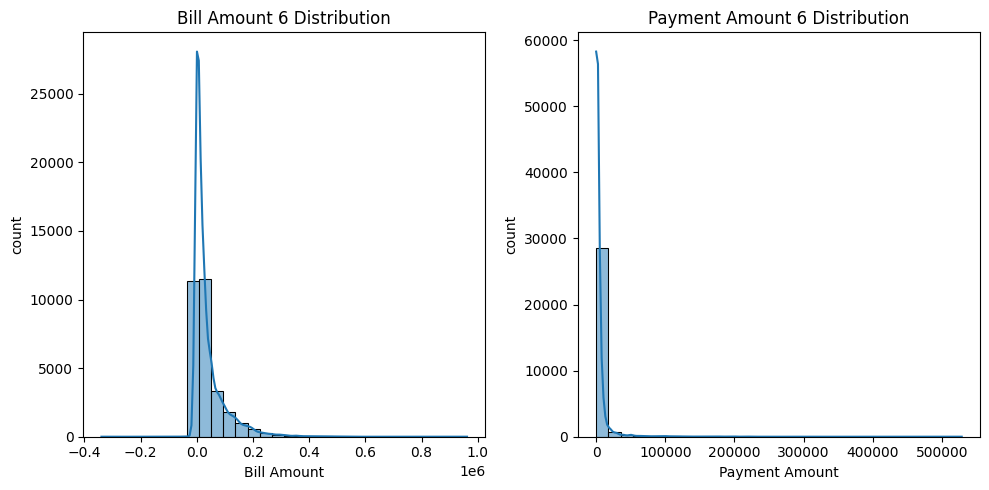

In [ ]:
# Distribution of Bill and Payment Amounts
for i in range(1,7):
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.histplot(df_numeric[f'BILL_AMT{i}'], bins =30, kde = True)
  plt.title(f'Bill Amount {i} Distribution')
  plt.xlabel('Bill Amount')
  plt.ylabel('count')

  plt.subplot(1,2,2)
  sns.histplot(df_numeric[f'PAY_AMT{i}'], bins=30, kde=True)
  plt.title(f'Payment Amount {i} Distribution')
  plt.xlabel('Payment Amount')
  plt.ylabel('count')

  plt.tight_layout()
  plt.show()

### Relationship Between Payment History and Default Status

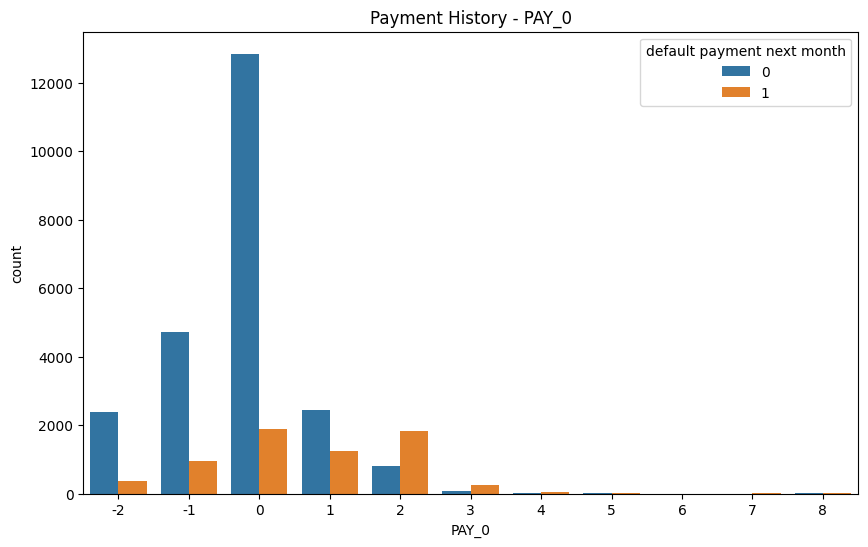

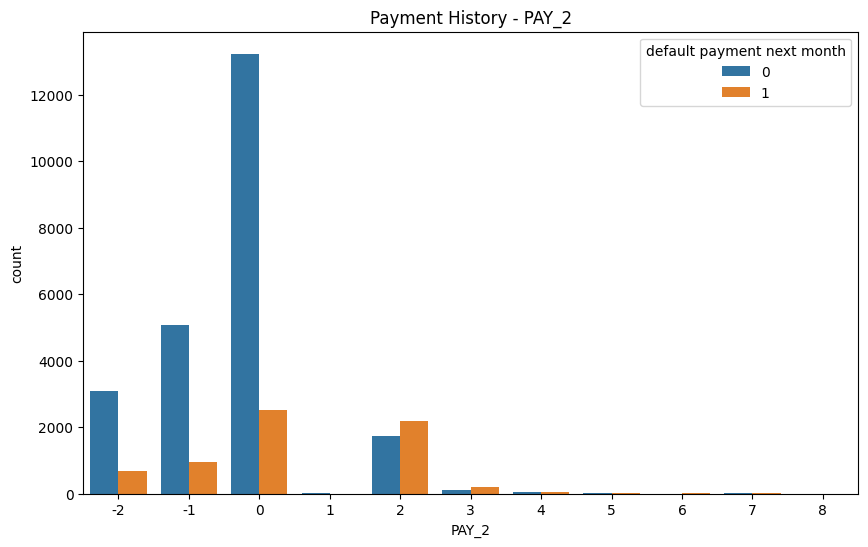

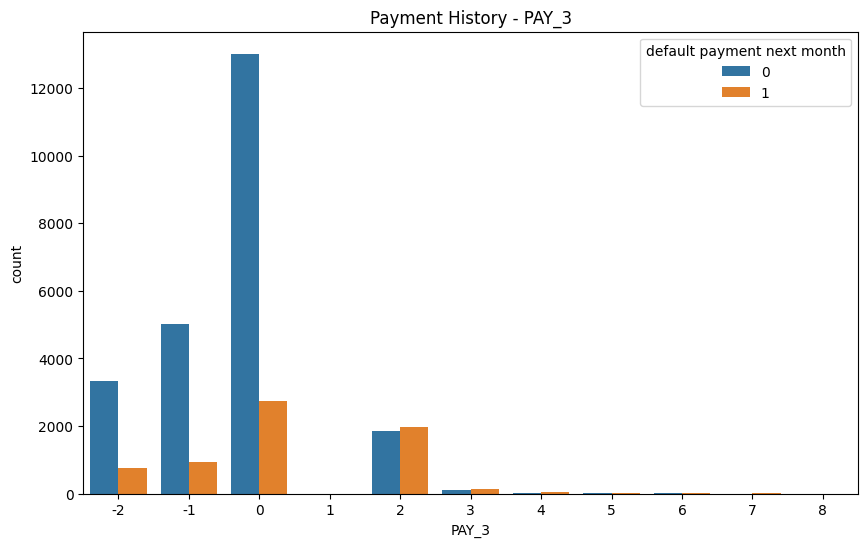

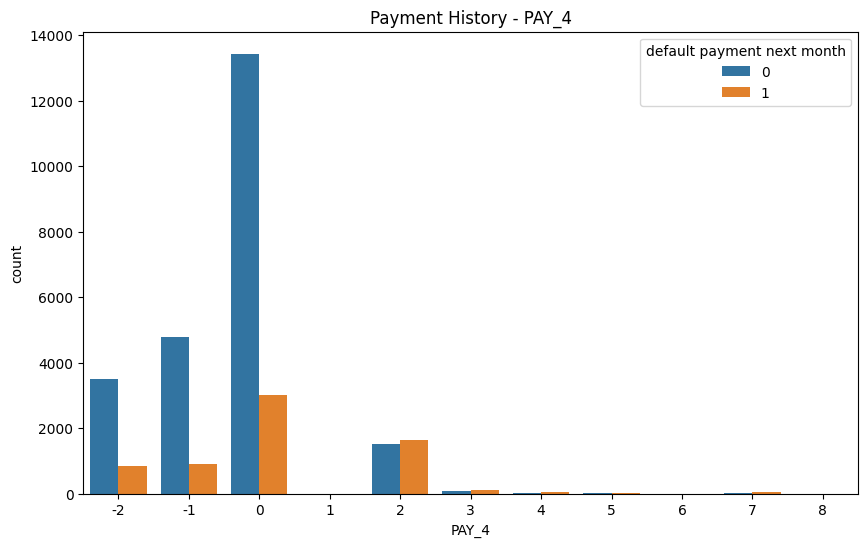

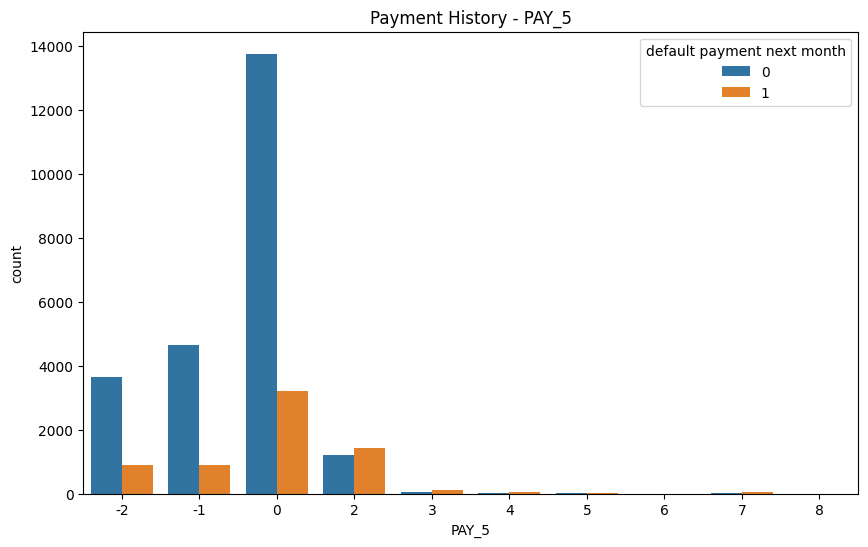

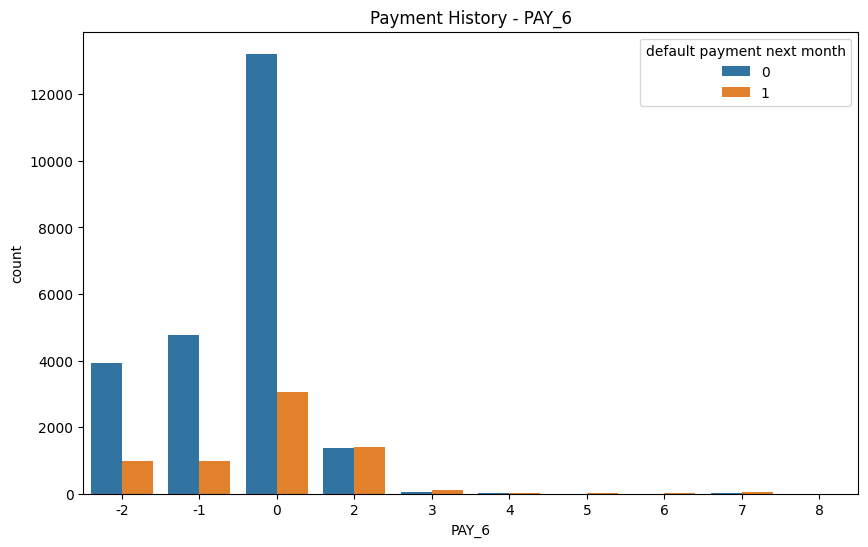

In [ ]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot( x=col, hue = 'default payment next month', data=df_numeric)
    plt.title(f'Payment History - {col}')
    plt.show()

### Count of Categorical Features

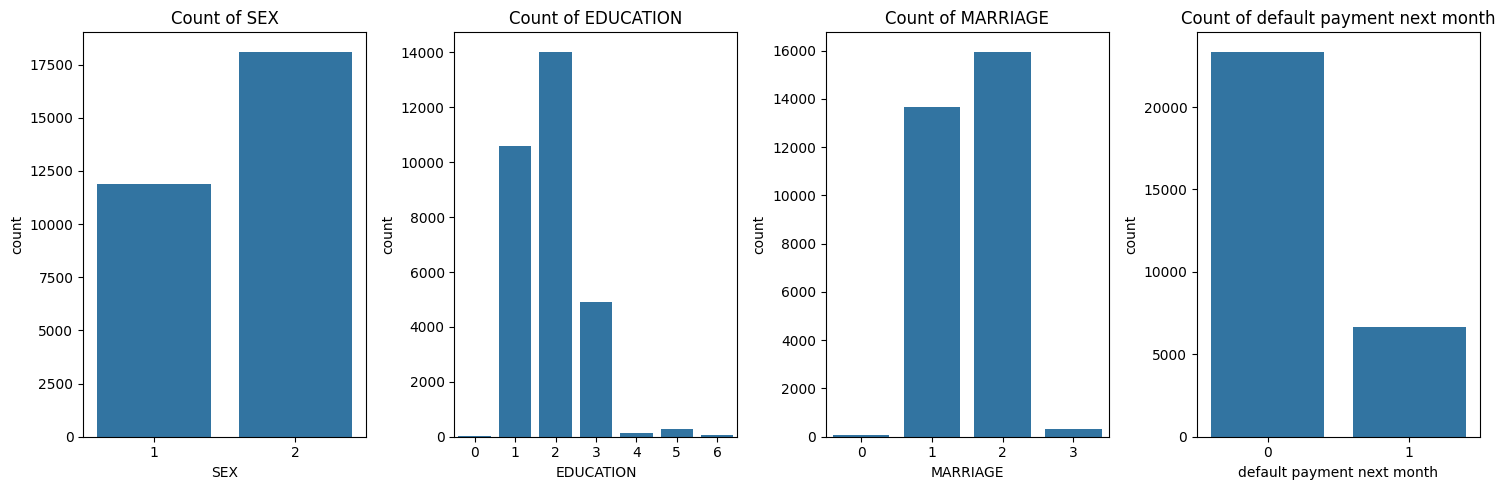

In [ ]:
# Visualize the count of categorical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month'] # Selecting categorical columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 4, i + 1)
    sns.countplot(data=df_numeric, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

### Distribution of Credit Limit (LIMIT_BAL)

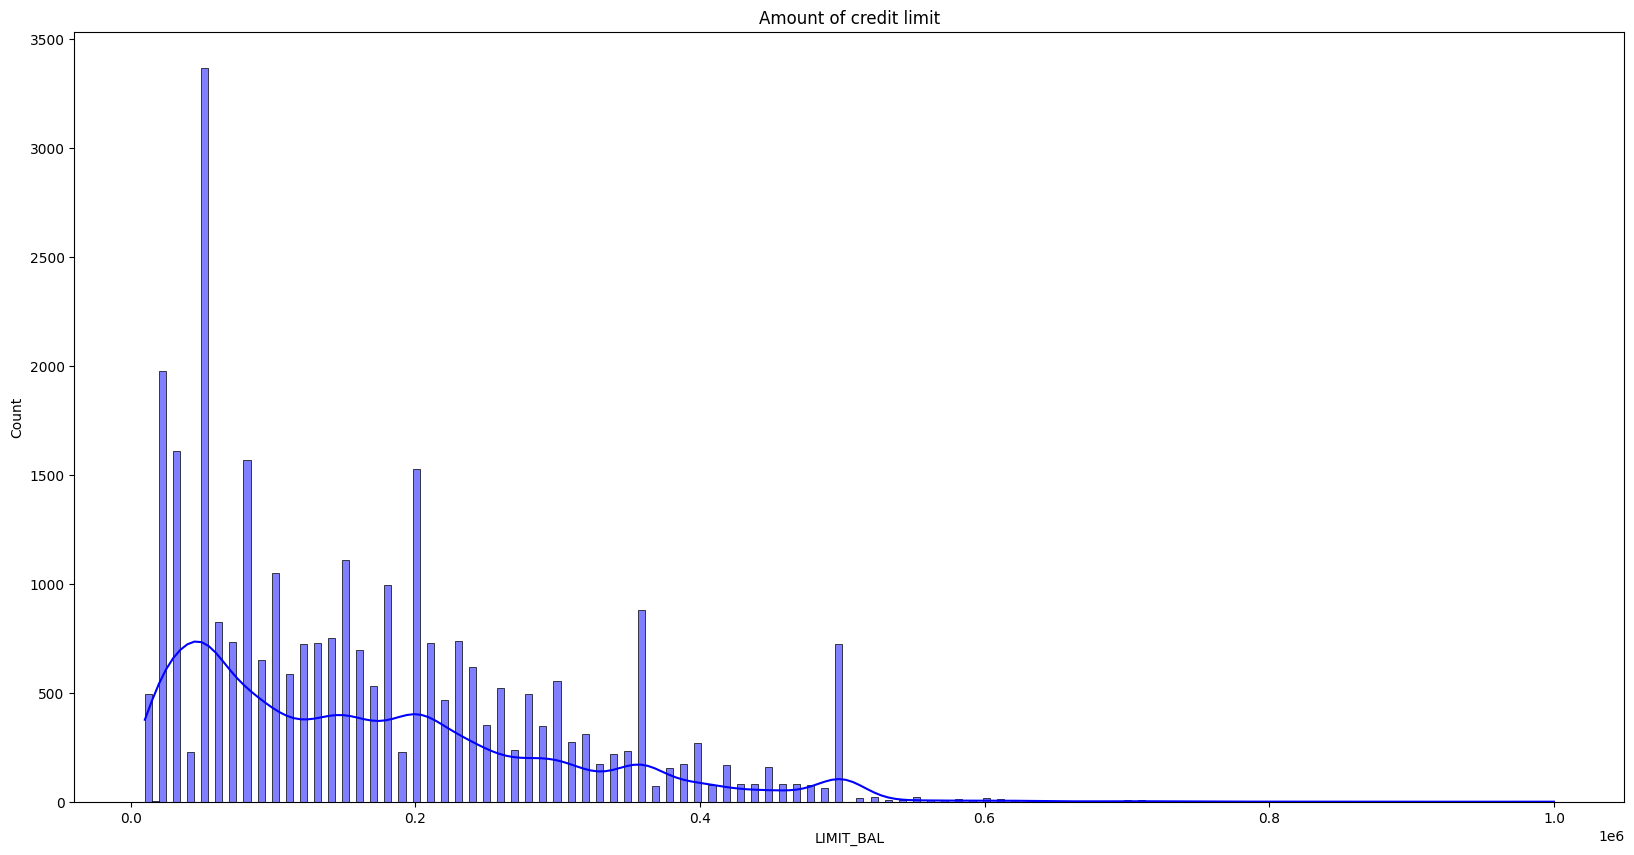

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Amount of credit limit')
sns.histplot(df_numeric['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')
plt.show()

### Skewness and Kurtosis

In [ ]:
numeric_cols = df_numeric.select_dtypes(include=np.number).columns

# Calculate skewness
print("Skewness:")
print(df_numeric[numeric_cols].skew())

# Calculate kurtosis
print("\nKurtosis:")
print(df_numeric[numeric_cols].kurtosis())

Skewness:
0
LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default payment next month     1.343504
dtype: float64

Kurtosis:
0


### Outlier Detection using IQR

In [ ]:
numeric_cols = df_numeric.select_dtypes(include=np.number).columns

outlier_indices = {}
for col in numeric_cols:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)].index
    outlier_indices[col] = outliers

print("Number of outliers per column (based on IQR):")
for col, indices in outlier_indices.items():
    print(f"{col}: {len(indices)}")

Number of outliers per column (based on IQR):
LIMIT_BAL: 167
SEX: 0
EDUCATION: 454
MARRIAGE: 0
AGE: 272
PAY_0: 3130
PAY_2: 4410
PAY_3: 4209
PAY_4: 3508
PAY_5: 2968
PAY_6: 3079
BILL_AMT1: 2400
BILL_AMT2: 2395
BILL_AMT3: 2469
BILL_AMT4: 2622
BILL_AMT5: 2725
BILL_AMT6: 2693
PAY_AMT1: 2745
PAY_AMT2: 2714
PAY_AMT3: 2598
PAY_AMT4: 2994
PAY_AMT5: 2945
PAY_AMT6: 2958
default payment next month: 6636


### Boxplots to Visualize Outliers

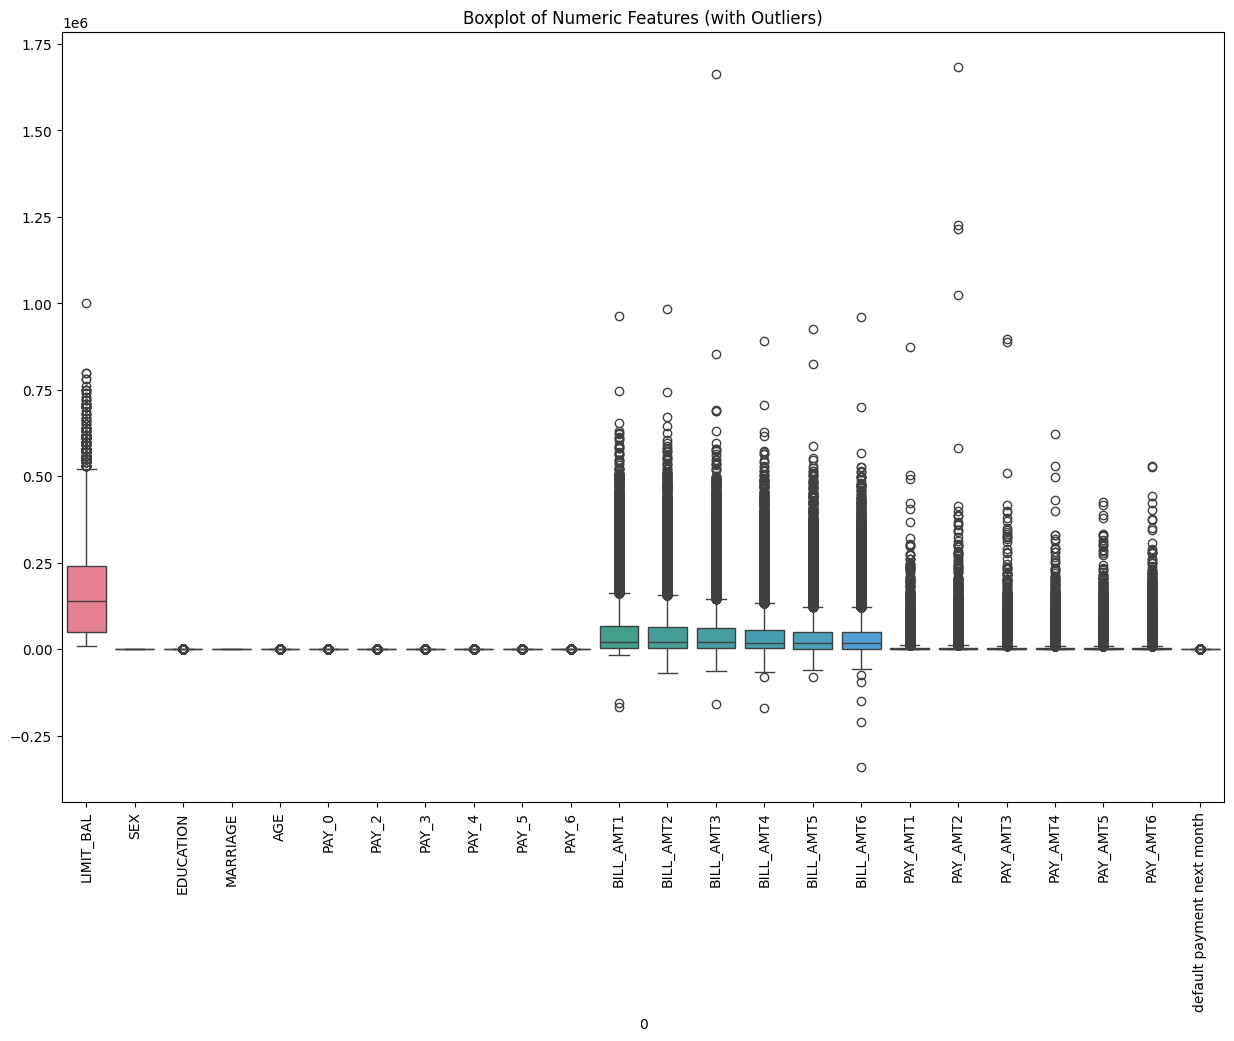

In [ ]:
# Create boxplots for numeric columns to visualize outliers
numeric_cols = df_numeric.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric[numeric_cols])
plt.title('Boxplot of Numeric Features (with Outliers)')
plt.xticks(rotation=90)
plt.show()

#### 5 Most Common Credit Limits

In [ ]:
# Top 5 Most Common Credit Limits (LIMIT_BAL)

df_numeric['LIMIT_BAL'].value_counts().head(5)

,count
LIMIT_BAL,
50000,3365
20000,1976
30000,1610
80000,1567
200000,1528


### Distribution of Credit Limit Grouped by Default Payment Status

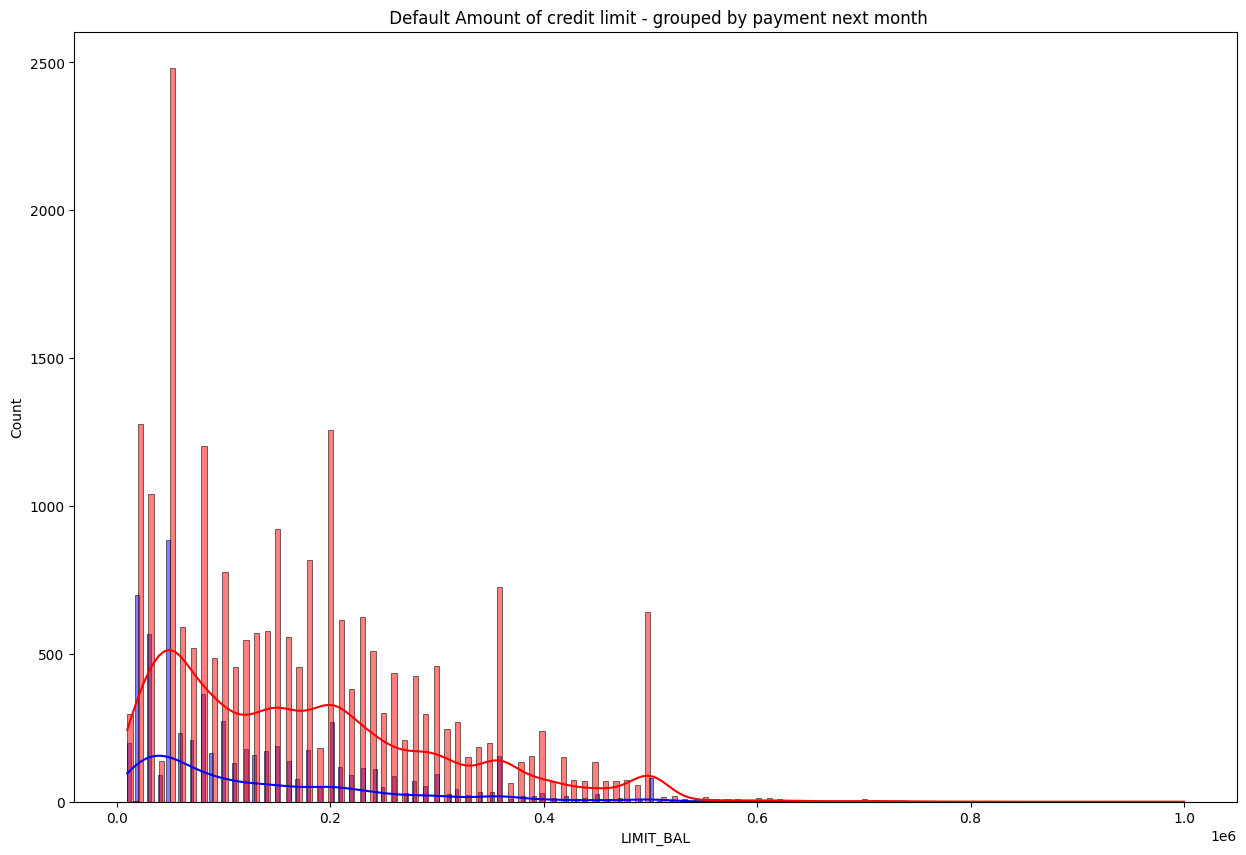

In [ ]:
# Distribution of Credit Limit (LIMIT_BAL) Grouped by Default Payment Status

class_0 = df_numeric.loc[df_numeric['default payment next month'] == 0]['LIMIT_BAL']
class_1 = df_numeric.loc[df_numeric['default payment next month'] == 1]['LIMIT_BAL']

plt.figure(figsize = (15, 10))
plt.title(' Default Amount of credit limit - grouped by payment next month')
sns.histplot(class_1, kde = True, bins = 200, color = 'blue')
sns.histplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()

#### Dropping Irrelevant Columns

In [ ]:
df_processed = df_numeric.drop('ID', axis='columns')

##### Sample of DataFrame after Dropping ID

In [ ]:
df.sample()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
22751,22751,350000,2,1,1,32,-1,-1,-2,-2,...,9950,22117,4874,60396,7147,9950,22117,4874,0,1


### Distribution of Default Payment

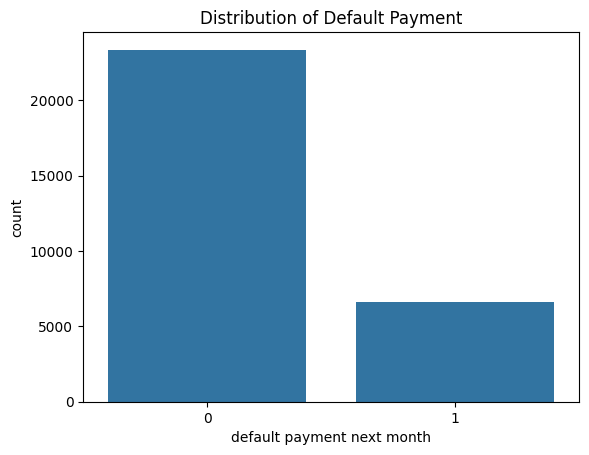

In [ ]:
sns.countplot(x = 'default payment next month', data = df_processed)
plt.title('Distribution of Default Payment')
plt.show()

### Handling Missing Values and Dropping Non-Predictive Columns


In [ ]:
target_col = 'default payment next month'

df_processed = df_processed.dropna(subset=[target_col]).reset_index(drop=True)

numeric_cols = df_processed.select_dtypes(include=np.number).columns.drop(target_col, errors='ignore')
df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())

if 'ID' in df_processed.columns:
    df_processed = df_processed.drop(columns=['ID'])

### Defining Features (X) and Target Variable (y)


In [ ]:
target_col = 'default payment next month'
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col].astype(int)

#### Train–Test Split with Stratified Sampling


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Target distribution train:", y_train.value_counts(normalize=True))
print("Target distribution test:", y_test.value_counts(normalize=True))


Train: (24000, 23) Test: (6000, 23)
Target distribution train: default payment next month
0    0.778792
1    0.221208
Name: proportion, dtype: float64
Target distribution test: default payment next month
0    0.778833
1    0.221167
Name: proportion, dtype: float64


### Feature Scaling with StandardScaler


In [ ]:
target_col = 'default payment next month'
X = df_processed.drop([target_col], axis = 1)
y = df_processed[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [ ]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,80000,2,2,2,24,0,0,0,0,0,...,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,30000,1,2,2,28,0,0,0,0,0,...,29155,25255,22001,0,5006,1244,851,955,0,0
22941,180000,2,5,1,44,0,0,-1,-1,-1,...,850,0,6881,10340,0,850,0,6881,10340,182
618,60000,1,1,2,25,0,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,130000,2,2,2,25,0,0,0,0,0,...,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000,1,2,2,32,0,0,0,0,0,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5390,200000,1,1,2,37,2,2,2,2,2,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
860,50000,1,1,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
15795,70000,2,2,2,25,0,0,0,0,2,...,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [ ]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,30000,1,2,2,25,0,0,0,0,0,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22404,150000,2,1,2,26,0,0,0,0,0,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23397,70000,2,3,1,32,0,0,0,0,0,...,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25058,130000,1,3,2,49,0,0,0,0,0,...,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2664,50000,2,2,2,36,0,0,0,0,0,...,42361,19574,20295,19439,2000,1500,1000,1800,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000,2,1,2,27,1,-2,-1,-1,-1,...,830,0,1271,179,0,830,0,1271,179,1970
14144,500000,2,1,2,28,2,0,0,2,0,...,111690,78070,78376,80912,6000,13151,0,3000,5000,10000
23108,60000,2,1,1,28,0,0,0,0,0,...,48696,50385,52045,52661,2100,2500,2500,2500,1600,1500
25703,20000,2,1,2,29,1,-1,-1,-1,-1,...,3967,1364,600,0,2494,3967,1370,600,0,0


In [ ]:
X_train_scaled

array([[-0.67235902,  0.80815856,  0.18430622, ..., -0.22465419,
        -0.21600791, -0.24524018],
       [-1.05776818, -1.23738094,  0.18430622, ..., -0.24078483,
        -0.30852284, -0.29553162],
       [ 0.0984593 ,  0.80815856,  3.97142033, ...,  0.12267581,
         0.35348711, -0.28510675],
       ...,
       [-0.90360452, -1.23738094, -1.07806515, ..., -0.29935805,
        -0.30852284, -0.29553162],
       [-0.74944086,  0.80815856,  0.18430622, ..., -0.22575819,
        -0.30852284, -0.22679617],
       [-0.05570437,  0.80815856,  0.18430622, ..., -0.19815824,
         0.60062042, -0.20961231]])

In [ ]:
X_test_scaled

array([[-1.05776818, -1.23738094,  0.18430622, ..., -0.20735823,
        -0.21248658, -0.18097254],
       [-0.1327862 ,  0.80815856, -1.07806515, ..., -0.13700903,
        -0.13764232, -0.14265253],
       [-0.74944086,  0.80815856,  1.44667759, ..., -0.14982767,
        -0.14846241, -0.14923967],
       ...,
       [-0.82652269,  0.80815856, -1.07806515, ..., -0.14602501,
        -0.20608416, -0.20961231],
       [-1.13485002,  0.80815856, -1.07806515, ..., -0.26255812,
        -0.30852284, -0.29553162],
       [ 2.64215975,  0.80815856,  1.44667759, ...,  0.09979852,
         2.89268582,  0.10542516]])

### Model Building


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()

}

results = []

# Impute missing values before scaling
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data after imputation
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train_imputed)
X_test_scaled = scaled.transform(X_test_imputed)


# Loop through each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_pred, y_test, average='weighted')

    # Append results
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1_Score': round(f1, 4)
    })

for result in results:
    print(result)

{'Model': 'Logistic Regression', 'Accuracy': 0.81, 'F1_Score': 0.8486}
{'Model': 'Decision Tree', 'Accuracy': 0.72, 'F1_Score': 0.7159}
{'Model': 'Random Forest', 'Accuracy': 0.8158, 'F1_Score': 0.8353}
{'Model': 'Gradient Boosting', 'Accuracy': 0.8198, 'F1_Score': 0.8418}
{'Model': 'KNN', 'Accuracy': 0.795, 'F1_Score': 0.812}


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.795

In [ ]:
classification_report = classification_report(y_test, y_pred)

In [ ]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.87      4687\n           1       0.55      0.36      0.43      1313\n\n    accuracy                           0.80      6000\n   macro avg       0.69      0.64      0.65      6000\nweighted avg       0.77      0.80      0.78      6000\n'

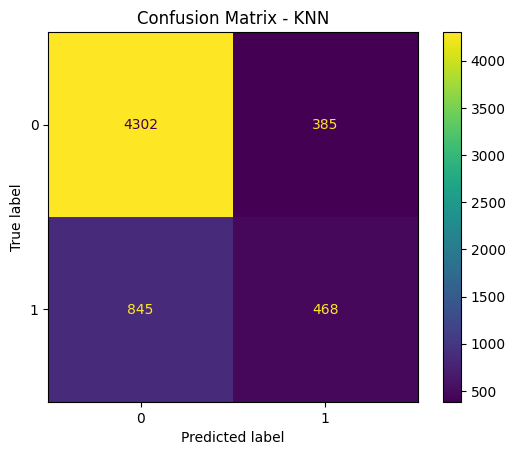

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

### Conclusion

Based on the analysis and model evaluation, we can conclude that while the Gradient Boosting model performed the best among the tested models, the KNN model, with an accuracy of 0.795 and an F1 score of 0.69, shows a discrepancy between overall accuracy and performance on the minority class. This suggests a class imbalance issue, where the model is better at predicting the majority class (non-defaulting customers). The confusion matrix for the KNN model provides further insight into this performance by showing the number of correct and incorrect predictions for each class. Feature importance analysis reveals that payment history and credit limit are significant factors in predicting default. Addressing the class imbalance during model training could potentially improve the prediction of defaulting customers.